The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Attribute Information:

All the features are geometric features extracted from the silhouette.
 
All are numeric in nature.
   
Only Class-The Target Variable is an object. 
   
Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

Importing Libraries

In [142]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline

Reading Data File in Python

In [190]:
dataset = pd.read_csv('vehicle.csv')#read the file in python

In [191]:
print("Shape of the data is",dataset.shape) # Check number of columns(19) and rows(846) in data frame

Shape of the data is (846, 19)


In [192]:
dataset.head()# To check first 5 rows of data set

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [193]:
dataset.describe().transpose()#checking the data distribution of each numerical column
# we see that the standard deviation for scaled_variance.1 is very high.
# There are no negative values

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [194]:
dataset.dtypes#check the datatypes of all the variables

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [195]:
# we see that only class is object type. Rest are numerical variables

no. of items of each type:
car    429
bus    218
van    199
Name: class, dtype: int64


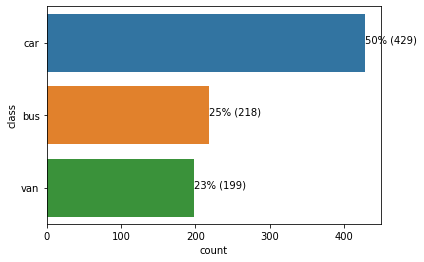

In [196]:
#checking the counts of each category in object variable. We find that car has the 
#majority numbers and van has the least
print("no. of items of each type:")
print(dataset['class'].value_counts()) #showing the counts of each category in object variable. 
#showing same in a plot
ax=sns.countplot(data=dataset, y = 'class', order=dataset['class'].value_counts().index) 
#showing % of total count on right of bar
total = len(dataset['class'])
for p in ax.patches:
    pcnt= int(100 * p.get_width()/total)
    #percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    cnt=p.get_width()
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate( str(pcnt)+"% ("+str(cnt)+")", (x,y) ) #label 
plt.show()

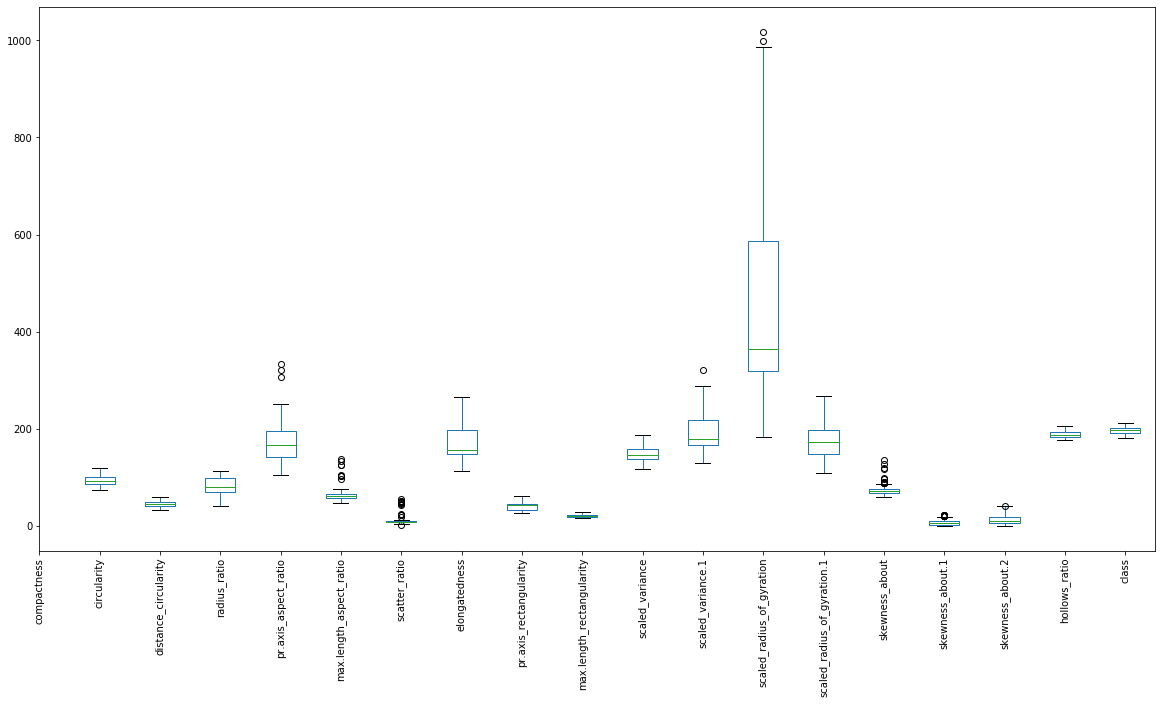

In [197]:
#Plotting Box plots to check the outliers in the data
dataset.plot(kind='box', figsize=(20,10))
plt.xticks(range(len(dataset.columns)),dataset.columns,rotation= "vertical")
plt.show()

In [198]:
# we see that the data has lot of outliers. we have to take care of outliers as Unsupervised algorithms are very 
#sucepitble to outliers

In [199]:
#dataset.hist(figsize=(15,15))
#plt.show()

In [200]:
dataset.isnull().sum()#to check the null values in the data

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [201]:
#we see that there are some null values in the data.We will take care of the same

In [202]:
dataset.info()# to check the null values and the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [203]:
def missing_values(a):
    if a==1:
        for i in dataset.columns[:-1]: 
            median_value = dataset[i].median()
            dataset[i] = dataset[i].fillna(median_value)
##fill the missing values in the data with the median value as deleting the rows with missing data will lead to data loss
#and as the data has outliers median will be the best choice. Mean gives average of all the values and it will not give
#the correct middle value as there are outliers in the data.
    if a==2:
        rw1,cl1=dataset.shape
        print ("before dropping rows with missing data", rw1, " rows, ",cl1, " columns")
        dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
        #print ("before dropping rows with missing data", dataset.shape)
        rw2,cl2=dataset.shape
        print ("after dropping rows with missing data", rw2, " rows, ",cl2, " columns : ", rw1-rw2, " ({:.1%}".format((rw1-rw2)/rw1),"%) rows dropped (had missing data)")

missing_values(2)

before dropping rows with missing data 846  rows,  19  columns
after dropping rows with missing data 813  rows,  19  columns :  33  (3.9% %) rows dropped (had missing data)


In [204]:
dataset.info()# checking if missing values are filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [205]:
#once the missing values are filled, now we will remove the outliers

In [217]:
def remove_outliers_all(b):
    if b==1:
        for col_name in dataset.columns[:-1]:
            q1 = dataset[col_name].quantile(0.25)
            q3 = dataset[col_name].quantile(0.75)
            iqr = q3 - q1
    
            low = q1-1.5*iqr
            high = q3+1.5*iqr
    
        dataset.loc[ (dataset[col_name] < low) | (dataset[col_name] > high), col_name] = dataset[col_name].median()
           
    if b==2:
        # by defining low and high bounds of percentile eg. 0.5 and 0.95
        qd = {} #quartile dictionary for dataset
        for col in dataset.columns:
            if col != 'class' and col != 'rono': 
                qd[col] = [np.quantile(dataset[col],0.05),np.quantile(dataset[col], 0.95)]
        
        for col in dataset.columns:
            if (((dataset[col].dtype)=='float64') | ((dataset[col].dtype)=='int64')): 
                q05 = qd[col][0]
                q95= qd[col][1]
                iqr = q95-q05
                lo = q05-(1.5*iqr)
                hi = q95+(1.5*iqr)
        #dset[col][dset[col] <= lo] = np.nan() # could set outliers to bounday value (lo) or null and delete later 
        #dset[col][dset[col] >= hi] = np.nan()
        #dset[ (dset[col] <= lo) | (dset[col] >= hi) ].dropna(inplace=True)
                dataset.drop(dataset[(dataset[col] <= lo) | (dataset[col] >= hi)].index, axis=0, inplace=True)
            else:
                dataset[col]=dataset[col]
                #dataset.reset_index(inplace=True)
    print("outliers eliminated. Remaining dataset:")
    #print(dataset.info())
        
        
    if b==3:
        qd = {} #quartile dictionary for dataset
        for col in dataset.columns:
            if col != 'class' and col != 'rono': 
                qd[col] = [np.quantile(dataset[col],0.25),np.quantile(dataset[col], 0.75), np.quantile(dataset[col], 0.75)]
        
        for col in dataset.columns:
            if (((dataset[col].dtype)=='float64') | ((dataset[col].dtype)=='int64')): 
                q25 = qd[col][0]
                q75= qd[col][1]
                iqr = q75-q25
                lo = q25-(1.5*iqr)
                hi = q75+(1.5*iqr)
        #dset[col][dset[col] <= lo] = np.nan() # could set outliers to bounday value (lo) or null and delete later 
        #dset[col][dset[col] >= hi] = np.nan()
        #dset[ (dset[col] <= lo) | (dset[col] >= hi) ].dropna(inplace=True)
                dataset.drop(dataset[(dataset[col] <= lo) | (dataset[col] >= hi)].index, axis=0, inplace=True)
            else:
                dataset[col]=dataset[col]
                dataset.reset_index(inplace=True)
    print("outliers eliminated. Remaining dataset:")
    print(dataset.info())
       
remove_outliers_all(2)
dataset.shape       
        #we will replace the outlier values with the median values. We are not deleting the data as it will 
#lead to the loss of information in other 


outliers eliminated. Remaining dataset:
outliers eliminated. Remaining dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 21 columns):
level_0                        768 non-null int64
index                          768 non-null int64
compactness                    768 non-null int64
circularity                    768 non-null float64
distance_circularity           768 non-null float64
radius_ratio                   768 non-null float64
pr.axis_aspect_ratio           768 non-null float64
max.length_aspect_ratio        768 non-null int64
scatter_ratio                  768 non-null float64
elongatedness                  768 non-null float64
pr.axis_rectangularity         768 non-null float64
max.length_rectangularity      768 non-null int64
scaled_variance                768 non-null float64
scaled_variance.1              768 non-null float64
scaled_radius_of_gyration      768 non-null float64
scaled_radius_of_gyration.1    768 non-null f

(768, 21)

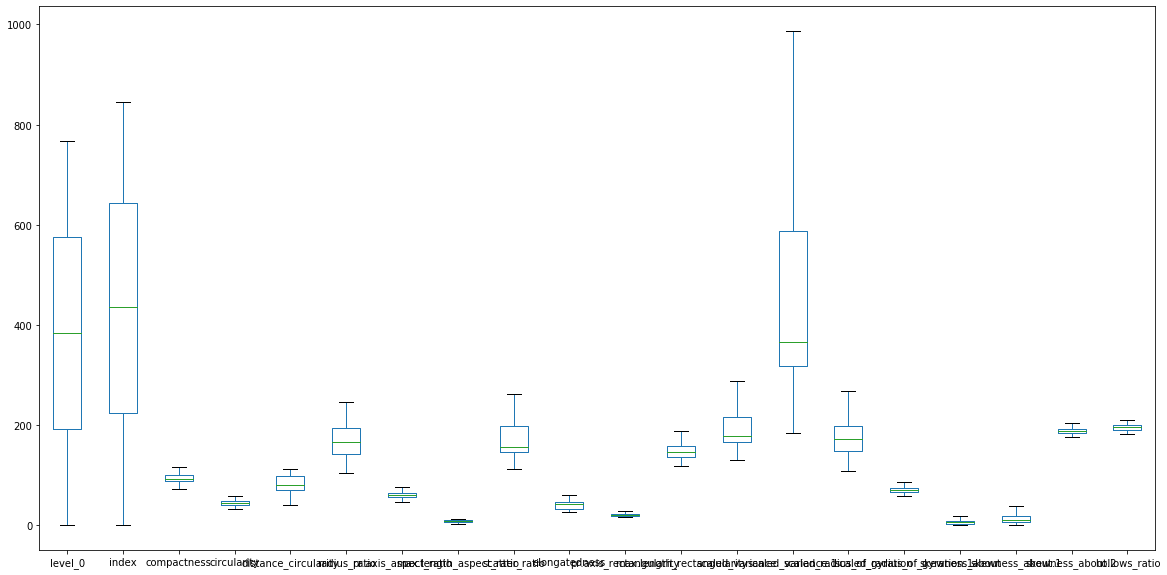

In [218]:
dataset.plot(kind='box', figsize=(20,10))# checking if the outliers are removed

In [22]:
#as we can see that outliers have been taken care of we will now plot pairplot

2. Understanding the attributes - Find relationship between different attributes (Independent variables) and 
choose carefully which all attributes have to be a part of the analysis and why

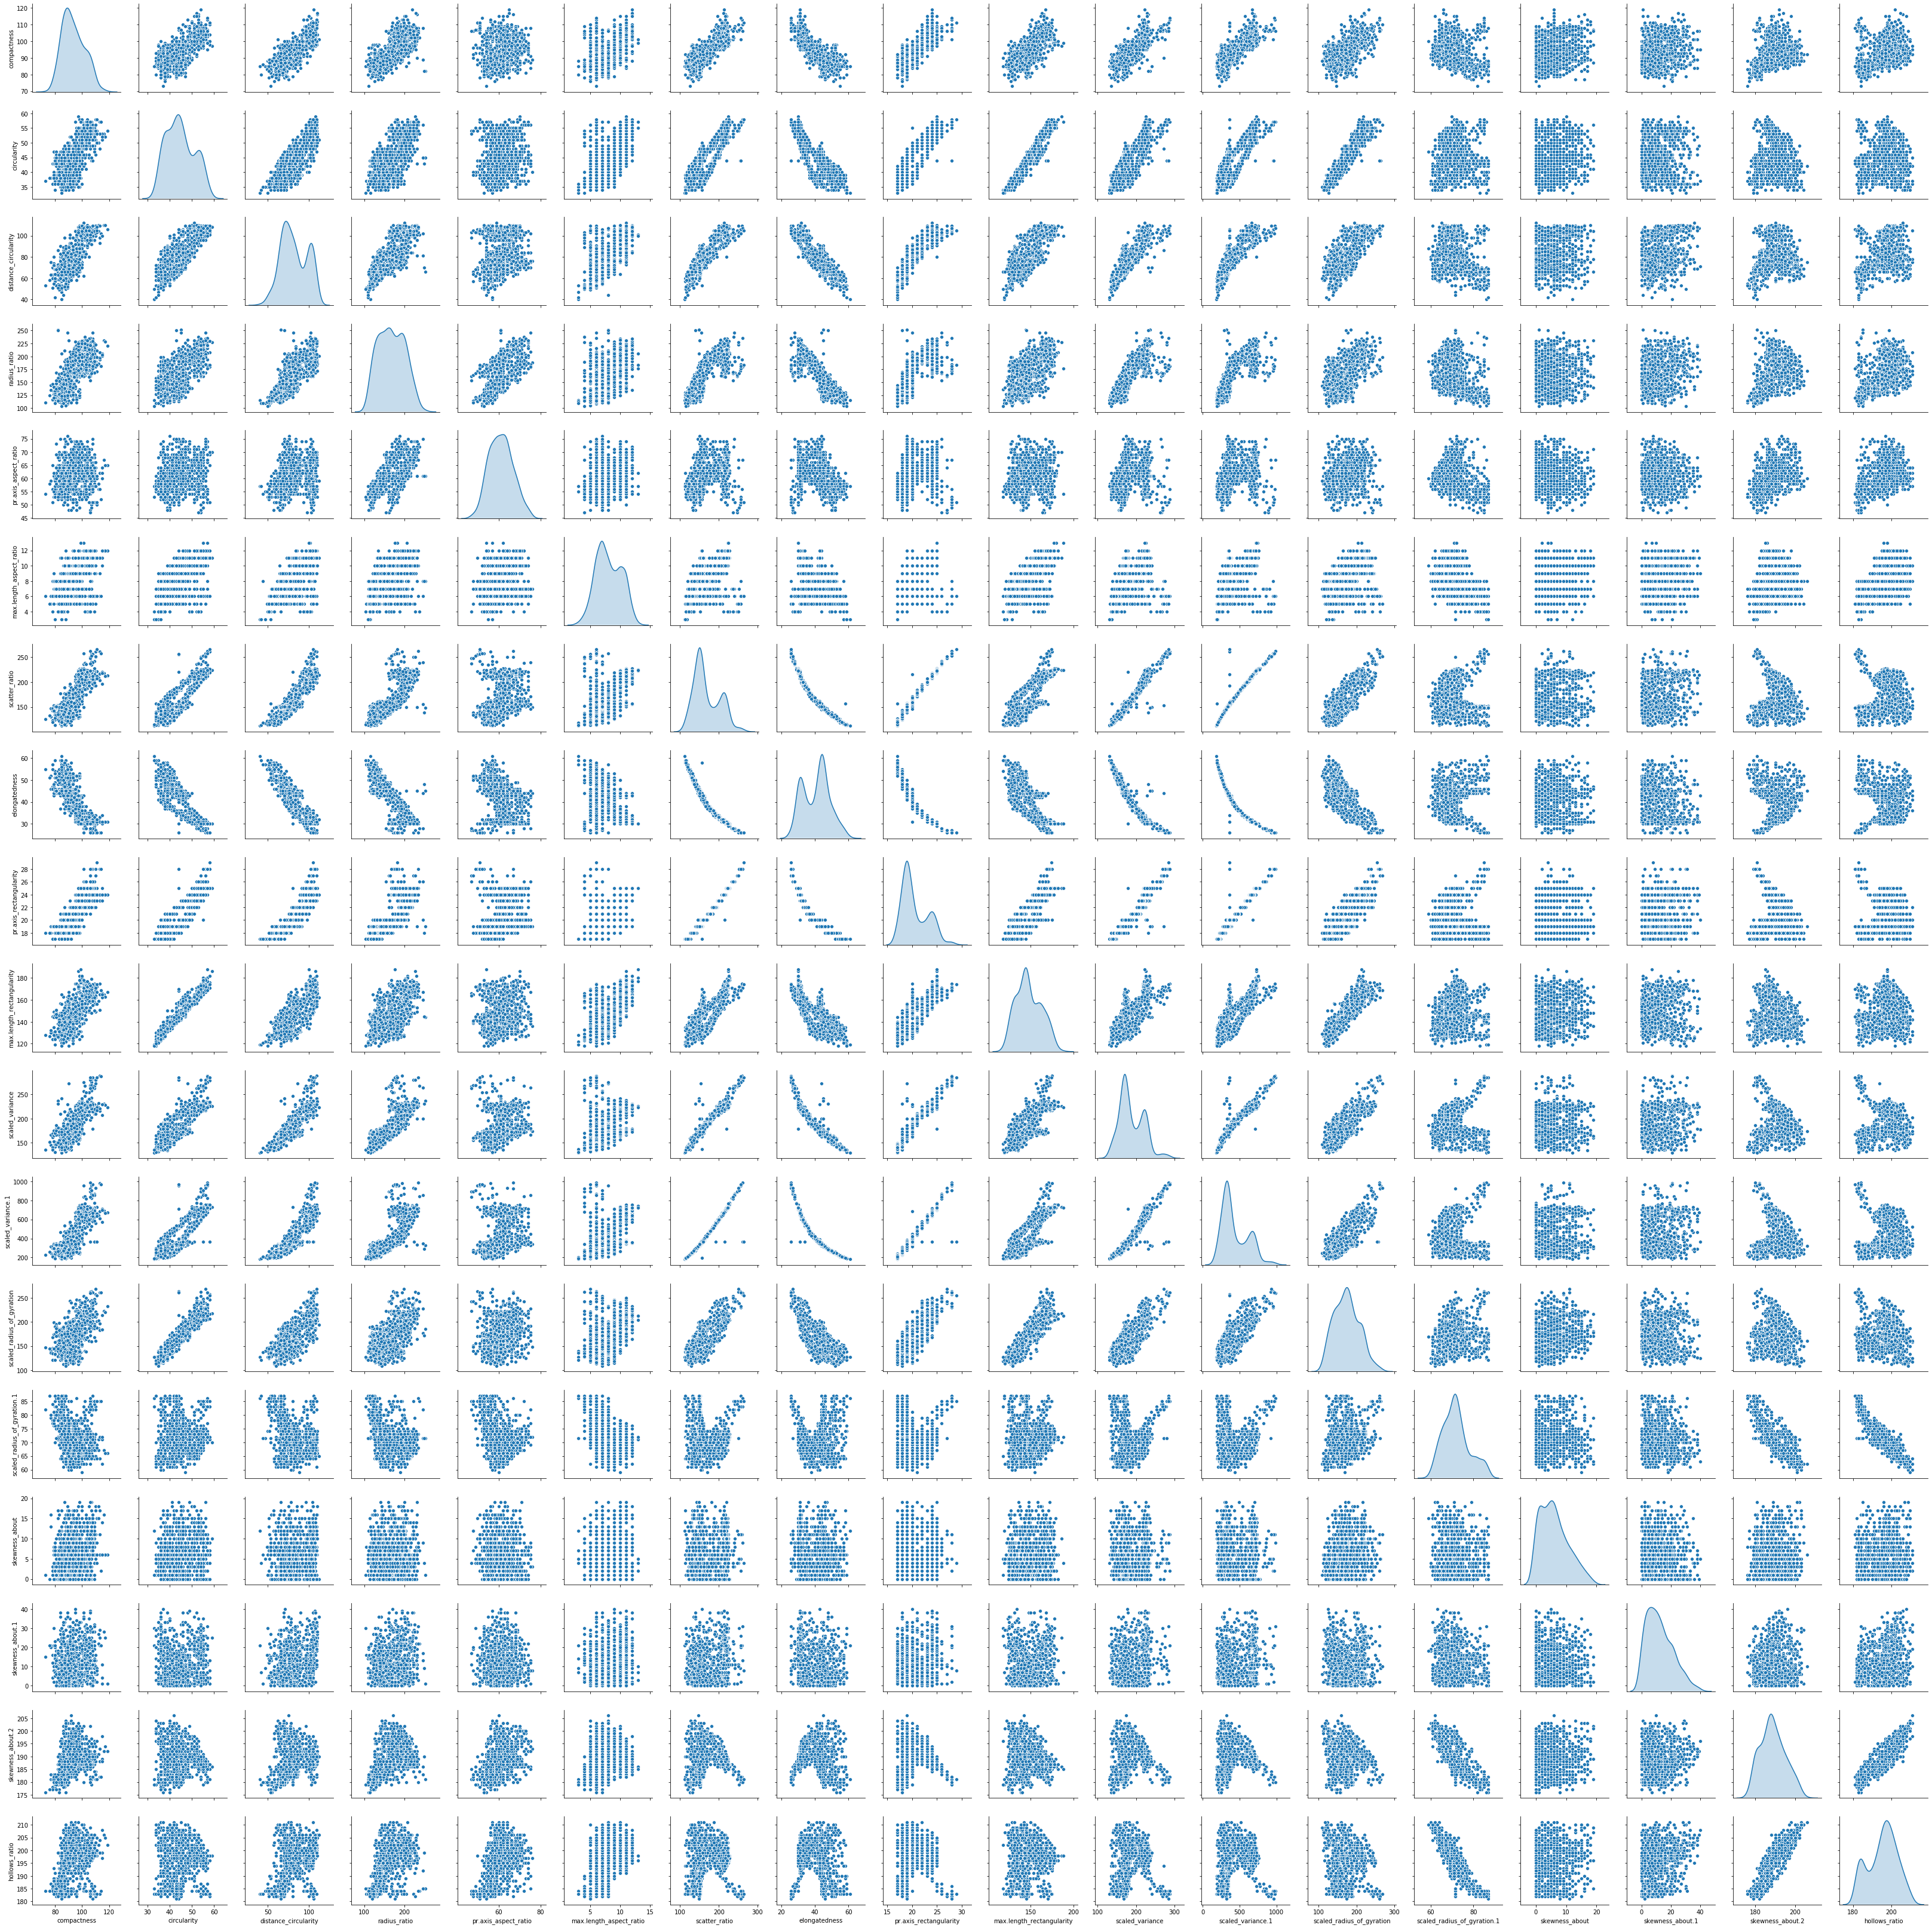

In [107]:
# to find the relationship between attributes visually, we will do pair plot
sns.pairplot(dataset,diag_kind='kde')

In [23]:
# In the pair plot there are following observations:
#1. There are 3 visible clusters in the pair plots
#2. There is correlation between many attributes. For the same we will draw correlation heat map.

In [219]:
dataset.corr()

level_0     index  compactness  circularity  \
level_0                      1.000000  0.999793     0.085425     0.051962   
index                        0.999793  1.000000     0.086009     0.052639   
compactness                  0.085425  0.086009     1.000000     0.682980   
circularity                  0.051962  0.052639     0.682980     1.000000   
distance_circularity         0.056032  0.056493     0.782818     0.791821   
radius_ratio                 0.047223  0.047441     0.741310     0.643689   
pr.axis_aspect_ratio        -0.022135 -0.022992     0.192992     0.203960   
max.length_aspect_ratio      0.052638  0.052592     0.501257     0.567757   
scatter_ratio                0.065736  0.066487     0.810476     0.853867   
elongatedness               -0.062881 -0.063486    -0.785106    -0.818571   
pr.axis_rectangularity       0.060434  0.061131     0.810711     0.853347   
max.length_rectangularity    0.044191  0.044735     0.669721     0.965352   
scaled_variance              0.059411  0.060054     0.793595     0.812867   
scaled_variance.1            0.061404  0.062147     0.817570     0.847831   
scaled_radius_of_gyration    0.049094  0.049491     0.574254     0.935760   
scaled_radius_of_gyration.1 -0.021017 -0.021371    -0.238878     0.088352   
skewness_about               0.022768  0.024408     0.190192     0.133988   
skewness_about.1             0.025693  0.026879     0.163261    -0.007842   
skewness_about.2             0.004272  0.004672     0.273695    -0.145854   
hollows_ratio                0.007811  0.008294     0.354235     0.028449   

                             distance_circularity  radius_ratio  \
level_0                                  0.056032      0.047223   
index                                    0.056493      0.047441   
compactness                              0.782818      0.741310   
circularity                              0.791821      0.643689   
distance_circularity                     1.000000      0.810345   
radius_ratio                             0.810345      1.000000   
pr.axis_aspect_ratio                     0.244211      0.667395   
max.length_aspect_ratio                  0.672984      0.449966   
scatter_ratio                            0.910061      0.800410   
elongatedness                           -0.908965     -0.851941   
pr.axis_rectangularity                   0.900106      0.773106   
max.length_rectangularity                0.765541      0.575237   
scaled_variance                          0.889178      0.806530   
scaled_variance.1                        0.894590      0.791854   
scaled_radius_of_gyration                0.704605      0.561994   
scaled_radius_of_gyration.1             -0.223000     -0.379400   
skewness_about                           0.085835      0.025606   
skewness_about.1                         0.270439      0.181957   
skewness_about.2                         0.099165      0.392193   
hollows_ratio                            0.311279      0.488124   

                             pr.axis_aspect_ratio  max.length_aspect_ratio  \
level_0                                 -0.022135                 0.052638   
index                                   -0.022992                 0.052592   
compactness                              0.192992                 0.501257   
circularity                              0.203960                 0.567757   
distance_circularity                     0.244211                 0.672984   
radius_ratio                             0.667395                 0.449966   
pr.axis_aspect_ratio                     1.000000                 0.118881   
max.length_aspect_ratio                  0.118881                 1.000000   
scatter_ratio                            0.210948                 0.510809   
elongatedness                           -0.311152                -0.508478   
pr.axis_rectangularity                   0.176633                 0.513968   
max.length_rectangularity                0.149452                 0.

In [220]:
def plot_corr(df, size=11):#defining a function to draw heat map for correlation between attributes
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation= "vertical")
    plt.yticks(range(len(corr.columns)), corr.columns)

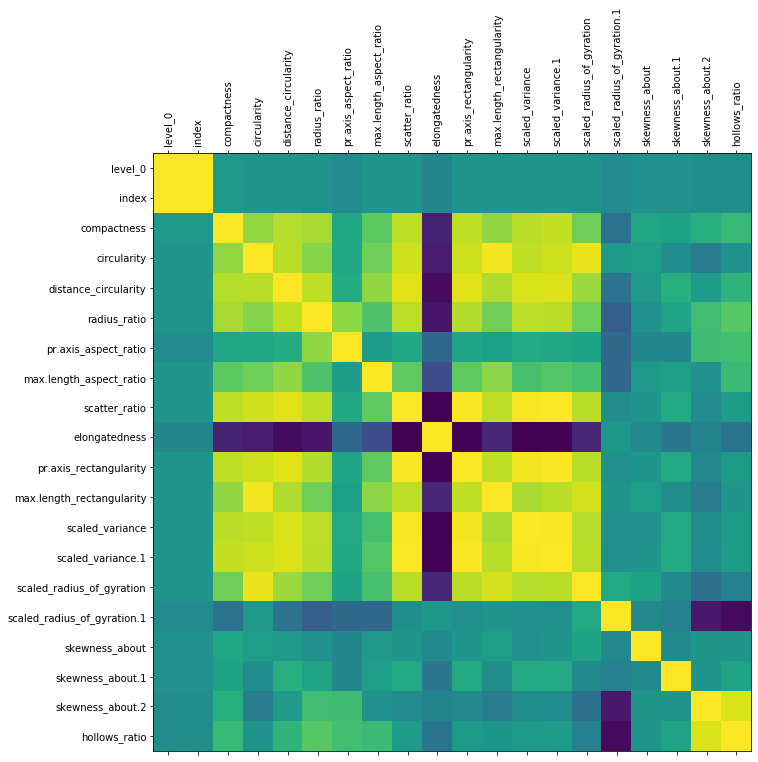

In [221]:
plot_corr(dataset)# correlation in graphical representation

In [222]:
#observations:
#1.we observe that some of the variables are positively correlated and some are negatively correlated
#2.some strongly(more than .90)correlate variables are:
    #a.circularity and max.length_rectangularity
    #b.circularity and scaled_radius_of_gyration
    #c.distance_circularity and scatter_ratio
    #d.scatter_ratio and pr.axis_rectangularity
    #e.scatter_ratio and scaled_variance
    #f.scatter_ratio and scaled_variance.1
    #g.pr.axis_rectangularity and scaled_variance
    #h.pr.axis_rectangularity and scaled_variance.1 
    #i. max.length_rectangularity and circularity
    #j. scaled_variance and scaled_variance.1
    #k.scaled_radius_of_gyration and circularity 
    
#3.strong negative correlations
    #l.distance_circularity and elongatedness
    #m.scatter_ratio and elongatedness
    #n.pr.axis_rectangularity and elongatedness
    #o.scaled_variance and elongatedness
    #p.scaled_variance.1 and elongatedness
    
#we can remove circularity(from a,b&k),scatter_ratio(from c,d,e &f),pr.axis_rectangularity(from g,h&n) and
#scaled_variance.1 (from j).But in this data we have been asked first specifically to take whole data and perform
# SVM and then perform PCA. Hence we will take all the variables into consideration

Scaling the data

In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(dataset.drop(columns = 'class'))


3. Split the data into train and test (Suggestion: specify “random state” if you are
using train_test_split from Sklearn)

Splitting the data

In [1]:
X = scaled_df
y = dataset['class']

X_train, X_test, Y_train, Y_test = train_test_split(X,y, random_state = 10)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

NameError: name 'scaled_df' is not defined

4. Train a Support vector machine using the train set and get the accuracy on the test set

In [225]:
# Training an SVC using the actual attributes(scaled)and getting accuracy score

model = SVC(gamma = 'auto')

model.fit(X_train,Y_train)

score_using_actual_attributes = model.score(X_test, Y_test)

print("Actual Accuracy score by SVC",score_using_actual_attributes)

Actual Accuracy score by SVC 0.96875


In [ ]:
#### Finding the best Hyperparameters for SVM
model = SVC()

params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf'], 'gamma' : ['auto', 'scale' ]}

model1 = GridSearchCV(model, param_grid=params, verbose=5)

model1.fit(X_train, Y_train)

print("Best Hyper Parameters:\n", model1.best_params_)

In [227]:
# Training SVC model after putting the best hyperparameters getting accuracy scores
model1 = SVC(C=1, kernel="rbf", gamma='auto')
scores = cross_val_score(model1, X, y, cv=10)#crossvalidating the scores
CV_score = scores.mean()
print("NEW accuracy score is",CV_score)

NEW accuracy score is 0.9726383265856949


K Fold Analysis

In [228]:
from sklearn.model_selection import KFold # import KFold
X = scaled_df
y = dataset['class']
kf = KFold(n_splits=10) # Define the split - into 10 folds 
print('number of splits:',kf.get_n_splits(X)) # returns the number of splitting iterations in the cross-validatorprint(kf) 

number of splits: 10


In [229]:
#for train_index, test_index in kf.split(X):# for checking the split data
 #print('TRAIN:', train_index, 'TEST:', test_index)
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#Perform K-fold cross validation
scores = cross_val_score(model, X, y, cv=kf)
print ('Cross-validated scores:', scores)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Cross-validated scores: [0.92207792 0.98701299 0.97402597 0.96103896 0.97402597 0.96103896
 0.96103896 0.97402597 0.96052632 0.98684211]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [231]:
scores_mean = scores.mean()# we will take the mean of the 10 accuracy scores
print("NEW K-Fold accuracy score is",scores_mean,"\nstandard deviation is:",scores.std())

NEW K-Fold accuracy score is 0.9661654135338346 
standard deviation is: 0.017612098132766797


6.Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

Let's create Principle Components out of the attributes

In [232]:
from sklearn.decomposition import PCA

pca = PCA().fit(scaled_df)
#print("Explained Variance:Eigen Values\n",pca.explained_variance_)
#print("PCA Components:Eigen Vectors\n",pca.components_)
ratio=np.cumsum(pca.explained_variance_ratio_)
print("pca.explained_variance_ratio is :\n",ratio)

pca.explained_variance_ratio is :
 [0.49114494 0.65752006 0.75738507 0.81761895 0.87573309 0.92050607
 0.95332778 0.96987779 0.98142922 0.98707964 0.99095662 0.99390305
 0.99589675 0.99725938 0.99828729 0.99906783 0.99966797 0.99997264
 0.99999004 1.        ]


Max. % Variance of total explained by no. of factors
no. of factors, % variance explained
1               49.11%
2               65.75%
3               75.74%
4               81.76%
5               87.57%
6               92.05%
7               95.33%
8               96.99%
9               98.14%
10               98.71%
11               99.10%
12               99.39%
13               99.59%
14               99.73%
15               99.83%
16               99.91%
17               99.97%


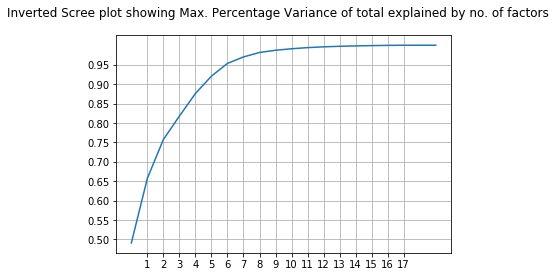

In [233]:
print("Max. % Variance of total explained by no. of factors")
print("no. of factors, % variance explained")
for i in range(1,18):
    print(i, "             ",  "{:0.2%}".format(ratio[i-1]))

plt.xticks(np.arange(1, 18, 1))
plt.yticks(np.arange(0, 1.0, 0.05))
plt.suptitle('Inverted Scree plot showing Max. Percentage Variance of total explained by no. of factors')
plt.grid()
plt.plot(ratio)
plt.show()

In [234]:
#We see in the Plot above that (and also from the values)after 7 components, 95% of the data has been covered.
# the number of components can range from 7-10 for the best crossvalidation score. Hence we will check with 7-10 
#components

7.Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. 
And the accuracy score should be on the same rows of test data that were used earlier

In [235]:
#PC is Principal Components
for n in range(7,11):
    pca = PCA(n_components=n)
    X = pca.fit_transform(scaled_df)
    Y = dataset['class']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)# splitting the data with PC
    #print("train and test data is :",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    # Training an SVC using the PCs instead of the actual attributes 
    model = SVC(gamma= 'auto')
    model.fit(X_train,Y_train)
    score_PCs = model.score(X_test, Y_test)
    print("score with principal components ",n,'is',score_PCs)
    

score with principal components  7 is 0.8958333333333334
score with principal components  8 is 0.921875
score with principal components  9 is 0.9427083333333334
score with principal components  10 is 0.953125


In [236]:
#As we see above the accuracy score with 9 Principal Components is the best. Hence we will do the analysis with 
#9 components
pca = PCA(n_components=10)
X = pca.fit_transform(scaled_df)
Y = dataset['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)# splitting the data with PC
print("train and test data is :",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# Training an SVC using the PCs instead of the actual attributes 
model = SVC(gamma= 'auto')
model.fit(X_train,Y_train)
score_PCs = model.score(X_test, Y_test)
print("score with ", 9, " principal components is ",score_PCs)
print("*****")
print("10 splits, 9 factors")
print('eigenvalues :\n', pca.explained_variance_)
print('eigenvectors:\n', pd.DataFrame(pca.components_).transpose().sort_values(by=abs(0),axis=0,ascending=False)
          #.sort_values(by=0,axis=0,ascending=False)
     )
print("*****")

train and test data is : (576, 10) (192, 10) (576,) (192,)
score with  9  principal components is  0.953125
*****
10 splits, 9 factors
eigenvalues :
 [9.83570567 3.33184071 1.99990424 1.20624828 1.16379812 0.89662718
 0.65729004 0.33143165 0.23132995 0.1131556 ]
eigenvectors:
            0         1         2         3         4         5         6  \
8   0.310888  0.063582 -0.007771  0.113944 -0.009465  0.065649  0.098466   
13  0.308345  0.067297 -0.010265  0.117933 -0.014382  0.093767  0.135672   
10  0.308106  0.076988 -0.009618  0.111492  0.019897  0.057432  0.105349   
12  0.303437  0.061071 -0.013097  0.149037 -0.068577  0.128955  0.146571   
4   0.300746 -0.044873 -0.008588  0.069784  0.108821 -0.083603 -0.037373   
3   0.286795  0.136851 -0.018365 -0.215071 -0.019124 -0.107216 -0.053188   
11  0.275112  0.125607 -0.018230 -0.233721  0.067380 -0.226807 -0.080579   
5   0.272312 -0.203610 -0.027048  0.048298 -0.252109  0.132596 -0.129157   
2   0.270352 -0.092760  0.023063 -0.01

In [237]:
model = SVC(C=1, kernel="rbf", gamma='auto')#applying model with best hyperparameters
scores = cross_val_score(model, X, y, cv=10)
CV_score_pca = scores.mean()
print(CV_score_pca)

0.9492240215924426


K Fold Analysis on data with Principal Components

In [238]:
X = pca.fit_transform(scaled_df)
y = dataset['class']
kf = KFold(n_splits=10) # Define the split - into 10 folds 
print('number of splits:',kf.get_n_splits(X)) # returns the number of splitting iterations in the cross-validatorprint(kf) 

number of splits: 10


In [239]:
scores1 = cross_val_score(model, X, y, cv=kf)
print ('Cross-validated scores:', scores)
scores1_mean = scores.mean()
print("NEW K-Fold accuracy score is",scores1_mean,"\nstandard deviation is:",scores1.std())

Cross-validated scores: [0.8974359  1.         0.94871795 0.94871795 0.96052632 0.97368421
 0.92105263 0.94736842 0.97368421 0.92105263]
NEW K-Fold accuracy score is 0.9492240215924426 
standard deviation is: 0.023381775493212624


8.Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data 
and the other using Principal Components,and mention your findings

In [240]:
result = pd.DataFrame({'SVC' : ['All scaled attributes', '9 Principle components'],
                      'Accuracy' : [score_using_actual_attributes,score_PCs],
                      'Cross-validation score' : [CV_score,CV_score_pca],
                      'K-Fold Cross-Validation Score':[scores_mean,scores1_mean],
                      })

In [241]:
result

SVC  Accuracy  Cross-validation score  \
0   All scaled attributes  0.968750                0.972638   
1  9 Principle components  0.953125                0.949224   

   K-Fold Cross-Validation Score  
0                       0.966165  
1                       0.949224

Observations:
1.PCA has reduced 18 factors to a much more manageable 8 principal components and simultaneously increased accuracy of classification prediction marginally by about 0.5%.

2.The accuracy of .9622 has improved from .9575 by using the 9 principal components. The classifier thus got "sharper"

3.With K-Fold cross-validation we see that the Standard Deviation in case of 9 PC  has reduced.

4.For both (with and before PCA), applying K-Fold for getting the training/testing sets, hardly or very marginally increased cross-validation scores. 
